# Run YOLO V3 on Colab for images/videos

Hello there,
Today, we will be discussing how can we use the Darknet project on Google Colab platform. For those who are not familiar with these terms:

- The Darknet project is an open-source written in C, which is a framework to develop deep neural networks.
- Yolo V3 is an object detection algorithm. It is one of the state of the art solution when **accuracy/processing power needed** metric is considered.
- Google Cola is a cloud-based data science workspace similar to the jupyter notebook. Each Collabrotary session is equipped with a virtual machine running 13 GB of ram and either a CPU, GPU, or TPU processor. In most case, all the required packages are already installed on these machines and you can quite easily start development using Google Collaboratory. It saves us from installing process and it provides us **easy to accessible GPU's** which is also **free** under some constraints.

Have a look Ted Talk by Joseph Redmon the developer of the darknet project. The talk is about Darknet and YOLO projects which titled as “How computers learn to recognize objects instantly” . Darknet project aims to create a new neural network framework which is completely focused on simplicity and performance. The thing which I like about is its clarity and performance. All the code is written in C, to define a deep learning network you should only create a config file which defines the layers. By this way, it does not lose its performance capabilities also it provides us easy to use interface for development with this library.

Since I love both YOLO project and Google Colab, I decided to create a tutorial to use them together. I create a GitHub repository and a Collaboratory notebook for this purpose

- [Colab Notebook](https://colab.research.google.com/drive/1DcXQ_pLtLVvQAwILZR-kF0ZJwhkp11Jl)
- [mozanunal/yoloOnGoogleColab](https://github.com/mozanunal/yoloOnGoogleColab)

{% youtube Cgxsv1riJhI%}

**Please check**
- [YOLO website](https://pjreddie.com/darknet/yolo/)
- [Darknet website](https://pjreddie.com/darknet/)
- [YOLOV3 Paper](https://arxiv.org/abs/1804.02767)



## Install
Go to the directory, clear and install everthing


*   Clone the project
*   Change make file configurations and make OPENCV and GPU enable
*   Install opencv library


In [0]:

import cv2, os
import matplotlib.pyplot as plt
%matplotlib inline
  

In [2]:

!ls
!cd /content
!rm -fr darknet
!git clone https://github.com/AlexeyAB/darknet/
% cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!sed -i 's/GPU=0/GPU=1/g' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/g' Makefile
!apt update
!apt-get install libopencv-dev

sample_data
Cloning into 'darknet'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 12604 (delta 0), reused 0 (delta 0), pack-reused 12600
Receiving objects: 100% (12604/12604), 11.66 MiB | 11.27 MiB/s, done.
Resolving deltas: 100% (8560/8560), done.
/content/darknet
Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:4 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:5 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Hit:6 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:9 http://archive.ubunt

## `Compile and Configure`


* Compile YOLO
* Download YOLO weights



In [0]:
!make &> compile.log

In [11]:
!pip install gdown

In [12]:
!gdown https://drive.google.com/uc?id=1ZpR9zHQP4lT2rE3RXxVdGJY4ftj1_DJY

Downloading...
From: https://drive.google.com/uc?id=1ZpR9zHQP4lT2rE3RXxVdGJY4ftj1_DJY
To: /content/darknet/yolov3.weights
248MB [00:01, 233MB/s]


## Test An Image

In [0]:
def predictImage(imageDir):
  os.system("cd /content/darknet && ./darknet detect cfg/yolov3.cfg yolov3.weights {}".format(imageDir))
  image = cv2.imread("/content/darknet/predictions.jpg")
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()


In [7]:
!wget https://github.com/mozanunal/yoloOnGoogleColab/raw/master/test/test.jpg

--2020-03-05 02:25:51--  https://github.com/mozanunal/yoloOnGoogleColab/raw/master/test/test.jpg
Resolving github.com (github.com)... 140.82.118.3
Connecting to github.com (github.com)|140.82.118.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mozanunal/yoloOnGoogleColab/master/test/test.jpg [following]
--2020-03-05 02:25:51--  https://raw.githubusercontent.com/mozanunal/yoloOnGoogleColab/master/test/test.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68535 (67K) [image/jpeg]
Saving to: ‘test.jpg’

test.jpg            100%[===================>]  66.93K  --.-KB/s    in 0.007s  

2020-03-05 02:25:51 (9.08 MB/s) - ‘test.jpg’ saved [68535/68535]

3rdparty      CMakeLists.txt	      image_yolov3.sh

In [9]:
!ls

3rdparty      CMakeLists.txt	      image_yolov3.sh	     results
appveyor.yml  compile.log	      include		     scripts
backup	      darknet		      json_mjpeg_streams.sh  src
build	      DarknetConfig.cmake.in  LICENSE		     test.jpg
build.ps1     darknet.py	      Makefile		     video_v2.sh
build.sh      darknet_video.py	      net_cam_v3.sh	     video_yolov3.sh
cfg	      data		      obj
cmake	      image_yolov2.sh	      README.md


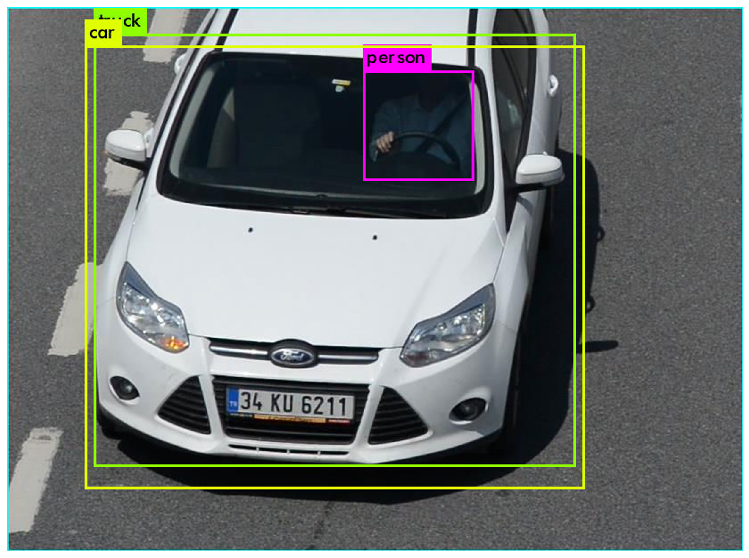

In [13]:
predictImage("test.jpg")

## Test with Video

In [0]:
def predictVideo(videoDir):
  os.system(""" cd /content/darknet && ./darknet detector demo cfg/coco.data cfg/yolov3.cfg yolov3.weights \
  -dont_show {} -i 0 -out_filename res.avi
  """.format(videoDir))


In [15]:
!wget https://github.com/mozanunal/yoloOnGoogleColab/raw/master/test/test.avi

--2020-03-05 02:32:08--  https://github.com/mozanunal/yoloOnGoogleColab/raw/master/test/test.avi
Resolving github.com (github.com)... 140.82.118.4
Connecting to github.com (github.com)|140.82.118.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mozanunal/yoloOnGoogleColab/master/test/test.avi [following]
--2020-03-05 02:32:08--  https://raw.githubusercontent.com/mozanunal/yoloOnGoogleColab/master/test/test.avi
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15897530 (15M) [application/octet-stream]
Saving to: ‘test.avi’

test.avi            100%[===================>]  15.16M  --.-KB/s    in 0.06s   

2020-03-05 02:32:09 (261 MB/s) - ‘test.avi’ saved [15897530/15897530]



In [16]:
!ls

3rdparty	compile.log		json_mjpeg_streams.sh  src
appveyor.yml	darknet			LICENSE		       test.avi
backup		DarknetConfig.cmake.in	Makefile	       test.jpg
build		darknet.py		net_cam_v3.sh	       video_v2.sh
build.ps1	darknet_video.py	obj		       video_yolov3.sh
build.sh	data			predictions.jpg        yolov3.weights
cfg		image_yolov2.sh		README.md
cmake		image_yolov3.sh		results
CMakeLists.txt	include			scripts


In [0]:
predictVideo("test.avi")


In [18]:
!du -h res.avi

93M	res.avi


Download res.avi using Files tab and play it.